## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [24]:
ls -a

 ./    .ipynb_checkpoints/                    'Kaggle Tabular Data.ipynb'
 ../  'Data Cleaning Machine Learning.ipynb'   Train/


In [67]:
# load data
try: 
    train = pd.read_csv("Train/proteinas_train.csv")
    test = pd.read_csv("Train/proteinas_test.csv")
    
    print("***** Data loaded successfully *****")
    print(f"Train shape: {train.shape}\nTest shape: {test.shape}\n")

    # Vertify critical columns exist
    required_cols = ['Massa_Molecular', 'Ponto_Isoelétrico', 'Classe']
    assert all(col in train.columns for col in required_cols), "Missing required columns"
except Exception as e:
    print(f"Loading Failed: {str(e)}")

***** Data loaded successfully *****
Train shape: (16000, 10)
Test shape: (4000, 10)



In [68]:
# Numerical features from data
num_features = ['Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 
                'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência']

In [69]:
# Missing Values
print("Missing Values (Train): ")
print(train[num_features].isnull().sum())

# Class distribution 
print("\nClass distribution  (Train): ")
print(train['Classe'].value_counts())

Missing Values (Train): 
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
dtype: int64

Class distribution  (Train): 
Classe
Enzima        3235
Estrutural    3232
Transporte    3225
Outras        3183
Receptora     3125
Name: count, dtype: int64


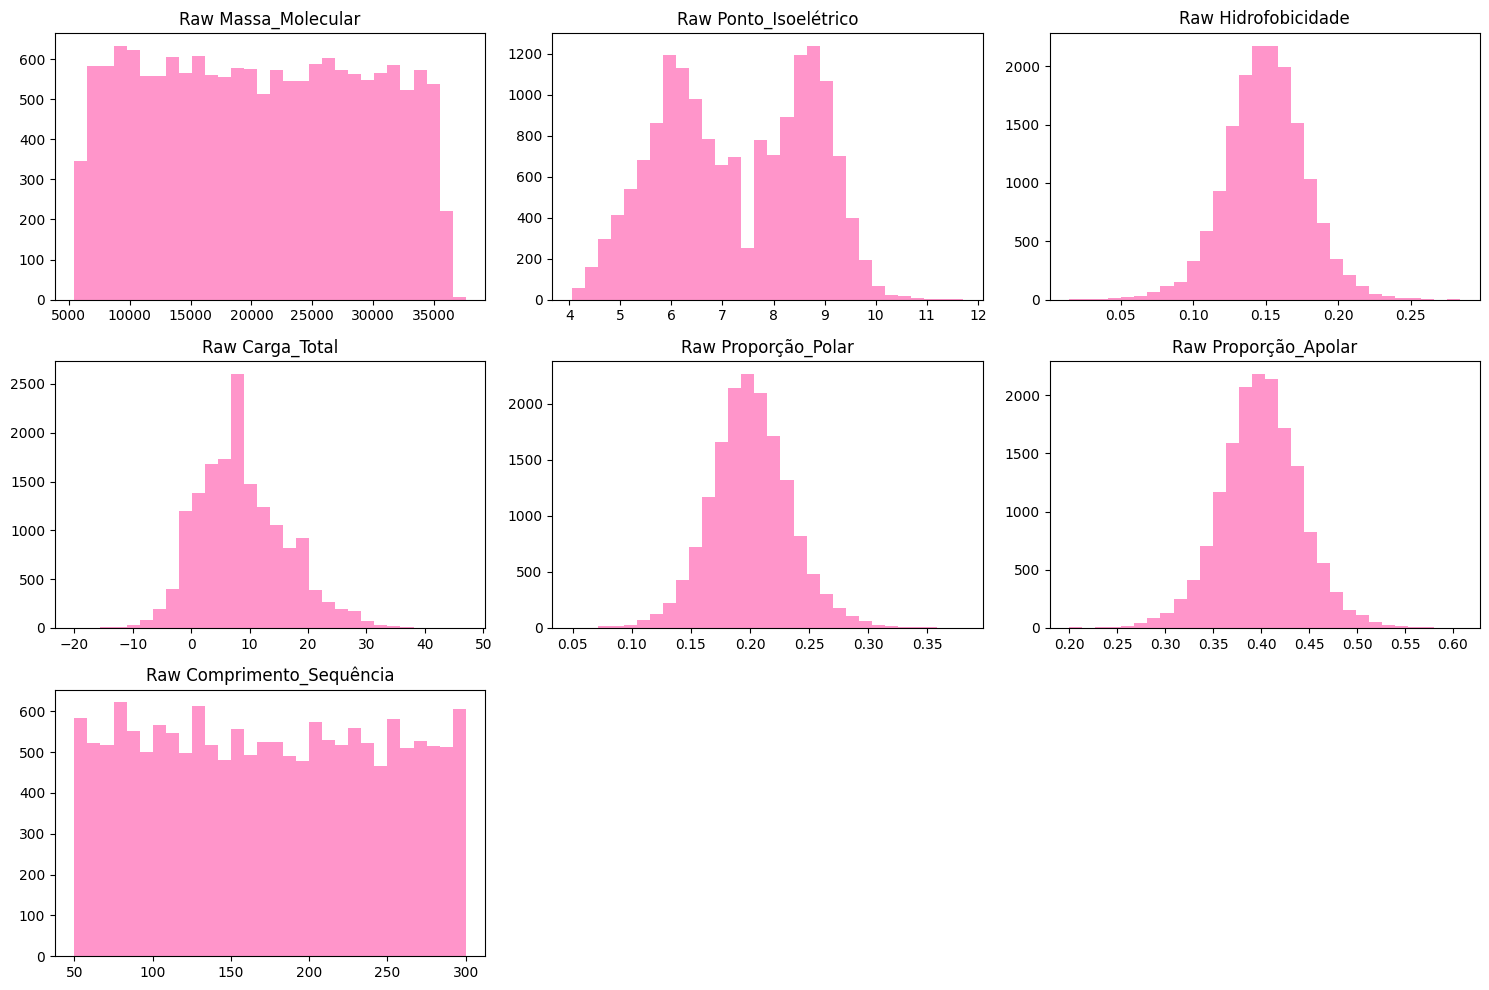

In [66]:
# Visualization of numerical features - pre-cleaning.
plt.figure(figsize=(15,10))
for i, feat in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(train[feat], bins=30, color='hotpink', alpha=0.7)
    plt.title(f'Raw {feat}')

plt.tight_layout()
plt.show()

In [87]:
from sklearn.impute import SimpleImputer

# Handles missing values - using median for numerical
imputer = SimpleImputer(strategy = 'median')
train[num_features] = imputer.fit_transform(train[num_features])
test[num_features] = imputer.transform(test[num_features])

In [101]:
# Validate sequence lengths
train['Seq_length_check'] = train['Sequência'].str.len() == train['Comprimento_Sequência']
test['Seq_length_check'] = test['Sequência'].str.len() == test['Comprimento_Sequência']

print(f"Mismatched sequence lengths: Train={(train['Seq_length_check'] == False).sum()}, Test={(test['Seq_length_check']== False).sum()}") 

Mismatched sequence lengths: Train=0, Test=0


In [102]:
# Removing temporary column
train.drop('Seq_length_check', axis=1, inplace = True)
test.drop('Seq_length_check', axis=1, inplace = True)

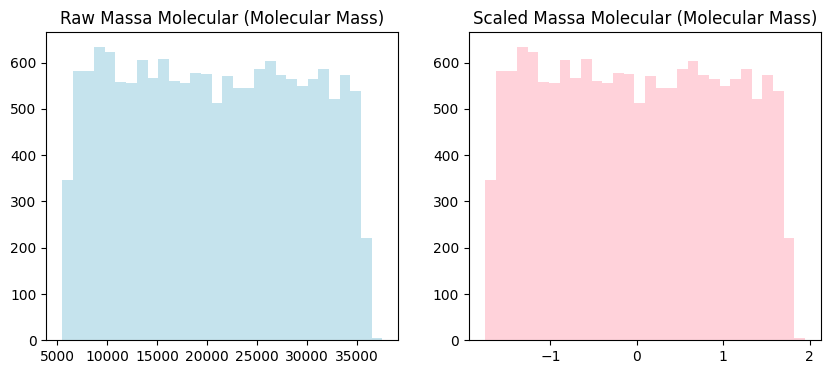

In [125]:
# Scale numerical features - Standard for ML models
scaler = StandardScaler()
test_scaled = test.copy()
train_scaled = train.copy()

train_scaled[num_features] = scaler.fit_transform(train[num_features])
test_scaled[num_features] = scaler.transform(test[num_features])

# visualization of scaling effect
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(train['Massa_Molecular'], bins=30, color='lightblue', alpha=0.7)
title1 = plt.title("Raw Massa Molecular (Molecular Mass)")

plt.subplot(1,2,2)
plt.hist(train_scaled['Massa_Molecular'], bins=30, color='pink', alpha=0.7)
title2 = plt.title("Scaled Massa Molecular (Molecular Mass)")